 # Examples of using cycle results plotting functions

In [ ]:
# Uncomment the following line when running on Google Colab
# !pip install autora

In [1]:
from autora.variable import VariableCollection, Variable
from autora.cycle import Cycle, plot_results_panel_2d, plot_results_panel_3d
from autora.experimentalist.pipeline import Pipeline
from autora.experimentalist.pooler.general_pool import grid_pool
from autora.experimentalist.sampler import random_sampler
from sklearn.linear_model import LinearRegression
import numpy as np
import random
%matplotlib inline

In [2]:
# Simple linear regression cycle
random.seed(1)

def ground_truth(xs):
    return xs + 1.0

# Variable Metadata
study_metadata = VariableCollection(
    independent_variables=[
        Variable(name="x1", allowed_values=np.linspace(0, 1, 100))
    ],
    dependent_variables=[Variable(name="y", value_range=(-20, 20))],
)

# Theorist
lm = LinearRegression()

# Experimentalist
example_experimentalist = Pipeline(
    [
        ("pool", grid_pool),
        ("sampler", random_sampler),
        ("transform", lambda x: [s[0] for s in x]),
    ],
    params={
        "pool": {"ivs": study_metadata.independent_variables},
        "sampler": {"n": 5},
    },
)

# Experiment Runner
def get_example_synthetic_experiment_runner():
    rng = np.random.default_rng(seed=180)

    def runner(xs):
        return ground_truth(xs) + rng.normal(0, 0.1, xs.shape)

    return runner

example_synthetic_experiment_runner = get_example_synthetic_experiment_runner()

# Initialize Cycle
cycle = Cycle(
    metadata=study_metadata,
    theorist=lm,
    experimentalist=example_experimentalist,
    experiment_runner=example_synthetic_experiment_runner,
)
cycle.run(5)

## Plotting 2D
The plotter will create a panel for each cycle.
* Default shows black points for previous data and orange points for new data to the cycle.
* The theory is plotted as a blue line.
* Default panel configuration is 4 plots to a row.

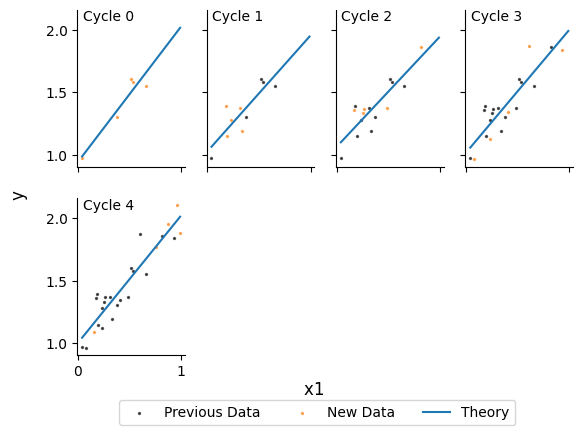

In [3]:
# Plot cycle results with each cycle as one panel
plot_results_panel_2d(cycle);  # Add semicolon to supress creating two figures in jupyter notebook

### Default parameters can be changed by passing in keywords

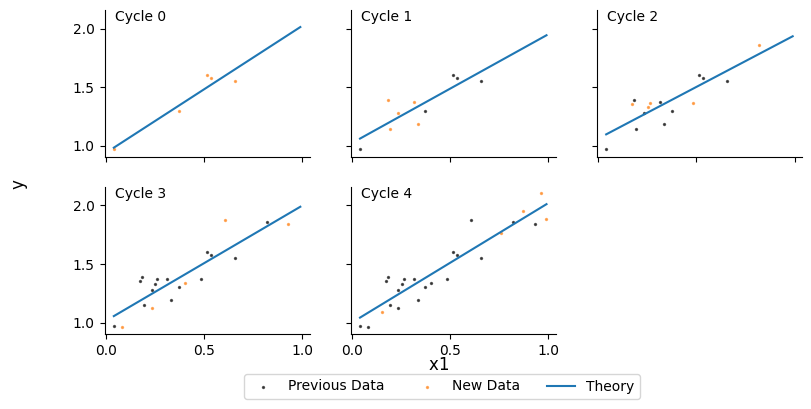

In [4]:
# Change wrap to 3 and Adjust dimensions
plot_results_panel_2d(cycle,
                      wrap=3,
                      subplot_kw=dict(figsize=(9,4.5))
                      );

Above the wrap is changed to 3 panels per row and the dimensions of the figure are adjusted.

* Keyword arguments can be supplied to the underlying matplotlib plotting functions as dictionaries.
   * The above example supplies figure dimensions to the [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) function using the keyword `subplot_kw`. The subplot function controls the layout and configuration of the entire figure of panels.
   * Below shows ways to specify the parameters of the [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) points and theory [line](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html).

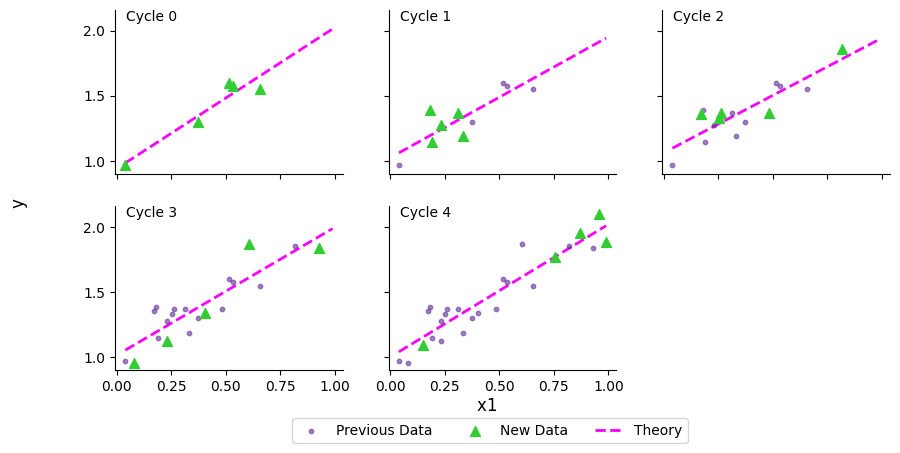

In [5]:
# Change wrap to 3, Adjust dimensions, adjust scatter plot and line colors, shapes, and sizes
fig = plot_results_panel_2d(cycle,
                      wrap=3,
                      subplot_kw=dict(figsize=(10,5)),  # Panel configurations
                      scatter_previous_kw=dict(color='rebeccapurple', marker='o', s=10),  # Previous data point
                      scatter_current_kw=dict(color='limegreen', marker='^', s=50, alpha=1),  # Current cycle data
                      plot_theory_kw=dict(color='magenta', ls='--', lw=2, zorder=0),  # Theory line
                      );

Saving the figure to an object (above) will allow you to cycle through the axes to make panel-specific edits.

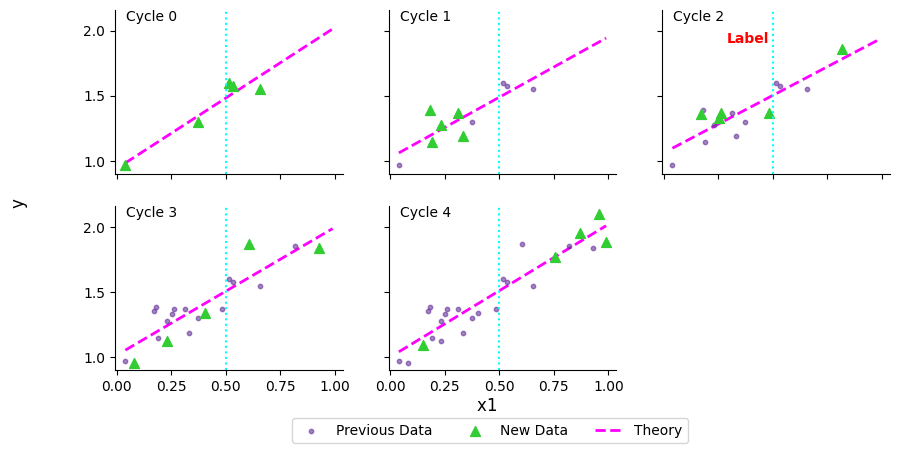

In [6]:
# Loop by the axes to draw annotations
for i,ax in enumerate(fig.axes[:-1]):
    ax.axvline(x=.5, c='cyan', ls=':')  # Vertical line at .5
    if i == 2:  # label on panel 3
        ax.text(.47, .8, 'Label', c='red', fontweight='bold', ha='right', transform=ax.transAxes)
fig


### Querying
You can query which cycles you wish to plot by using the `query` keyword. `query` accepts two types of inputs:
1. **List index**: A list of index values
2. **Slice**: Constructed with `slice()` or `np.s_[]`

Text(0.5, 0.98, 'Last Cycle')

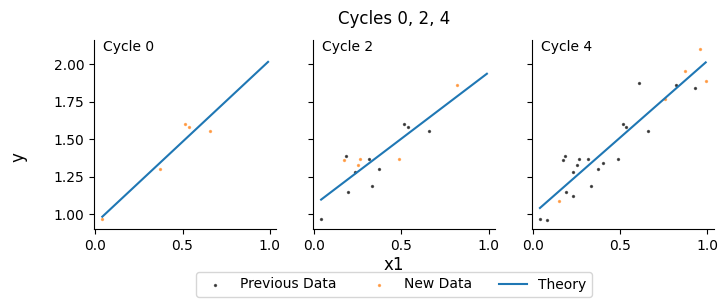

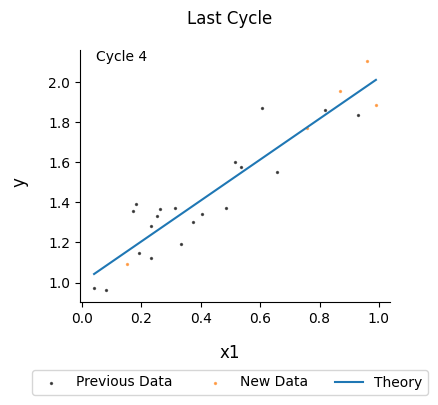

In [7]:
# Querying using indexing
fig = plot_results_panel_2d(cycle,
                      query=[0, 2, 4],
                      subplot_kw=dict(figsize=(8,3), gridspec_kw={"bottom": 0.25})
                      );
fig.supxlabel('x1', y=0.1)
fig.suptitle('Cycles 0, 2, 4')

# Last Cycle
fig = plot_results_panel_2d(cycle,
                      query=[-1],
                      subplot_kw=dict(figsize=(4,4), gridspec_kw={"bottom": 0.25})
                      );
fig.supxlabel('x1', y=0.1)
fig.supylabel('y', y=0.55, x='-.05')
fig.suptitle('Last Cycle')

Text(0.5, 0.1, 'x1')

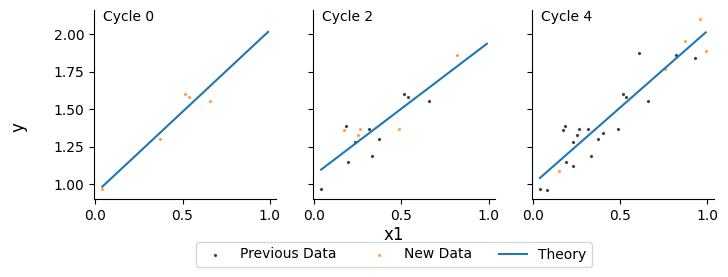

In [8]:
# Querying using slicing with the slice() function
fig = plot_results_panel_2d(cycle,
                      query=slice(0,5,2),  # (Start, Stop, Step)
                      subplot_kw=dict(figsize=(8,3), gridspec_kw={"bottom": 0.25})
                      );
fig.supxlabel('x1', y=0.1)

Text(0.5, 0.98, 'Last 2 Cycles')

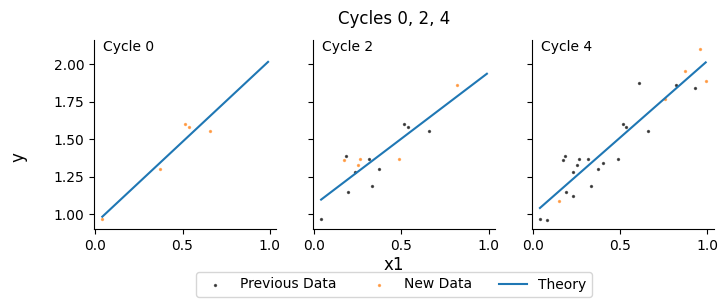

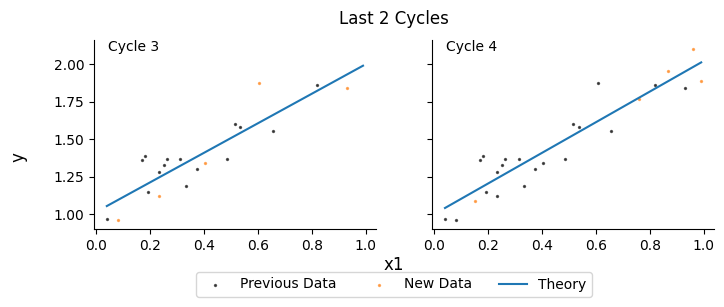

In [9]:
# Querying using slicing with np.s_[]
fig = plot_results_panel_2d(cycle,
                      query=np.s_[0:5:2],  # [Start:Stop:Step]
                      subplot_kw=dict(figsize=(8,3), gridspec_kw={"bottom": 0.25})
                      );
fig.supxlabel('x1', y=0.1)
fig.suptitle('Cycles 0, 2, 4')

# Last 2 Cycles
fig2 = plot_results_panel_2d(cycle,
                      query=np.s_[-2:],  # You can use other list slicing conventions
                      subplot_kw=dict(figsize=(8,3), gridspec_kw={"bottom": 0.25})
                      );
fig2.supxlabel('x1', y=0.1)
fig2.suptitle('Last 2 Cycles')

## Plotting 3D
The 3D plotter has similar functionality as the 2D plotter but will only work with problem spaces where there are exactly 2 independent variable values. Only one dependent value can be plotted at a time.

In [10]:
# Simple multiple linear regression cycle
random.seed(1)

def ground_truth(X):
    return X[:, 0] + (0.5 * X[:, 1]) + 1.0

# Variable Metadata
study_metadata = VariableCollection(
    independent_variables=[
        Variable(name="x", allowed_values=np.linspace(0, 1, 10)),
        Variable(name="y", allowed_values=np.linspace(0, 1, 10)),
    ],
    dependent_variables=[Variable(name="z", value_range=(-20, 20))],
)

# Theorist
lm = LinearRegression()

# Experimentalist
example_experimentalist = Pipeline(
    [
        ("pool", grid_pool),
        ("sampler", random_sampler),
        ("transform", lambda x: np.array(x)),
    ],
    params={
        "pool": {"ivs": study_metadata.independent_variables},
        "sampler": {"n": 10},
    },
)

# Experiment Runner
def get_example_synthetic_experiment_runner():
    rng = np.random.default_rng(seed=180)

    def runner(xs):
        return ground_truth(xs) + rng.normal(0, 0.25, xs.shape[0])

    return runner

example_synthetic_experiment_runner = get_example_synthetic_experiment_runner()

# Initialize Cycle
cycle_mlr = Cycle(
    metadata=study_metadata,
    theorist=lm,
    experimentalist=example_experimentalist,
    experiment_runner=example_synthetic_experiment_runner,
)
cycle_mlr.run(5)

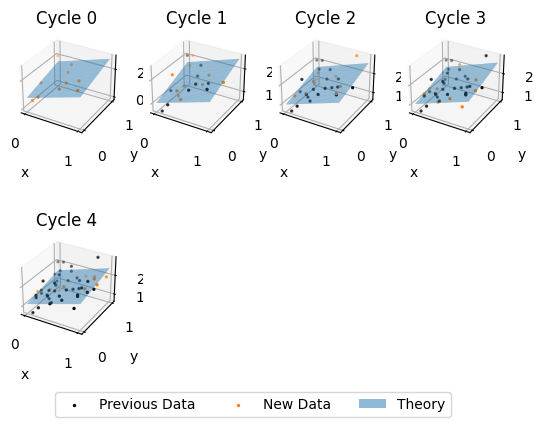

In [11]:
# Plot cycle results with each cycle as one panel using defaults
fig = plot_results_panel_3d(cycle_mlr);  # Add semicolon to supress creating two figures in jupyter notebook

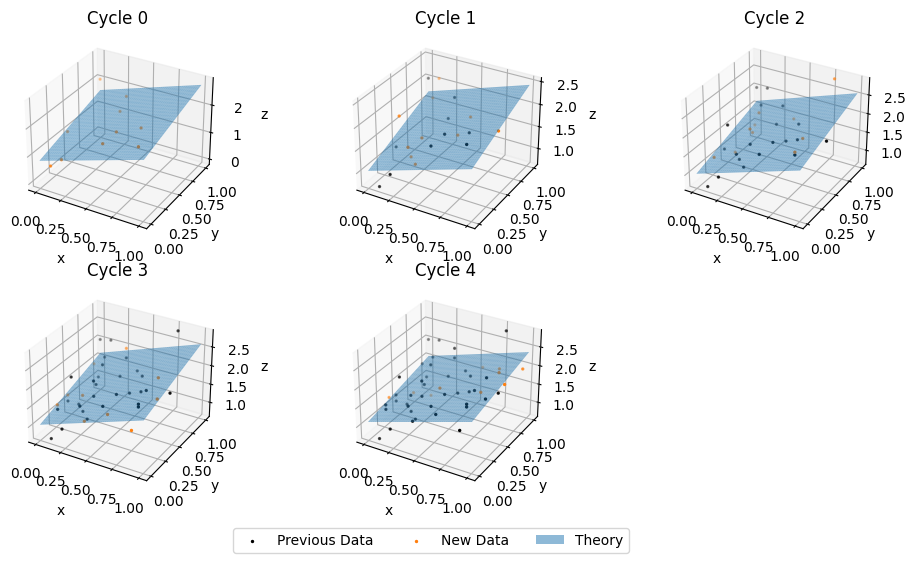

In [12]:
# Change wrap to 3 and Adjust dimensions
plot_results_panel_3d(cycle_mlr,
                      wrap=3,
                      subplot_kw=dict(figsize=(12,6))
                      );

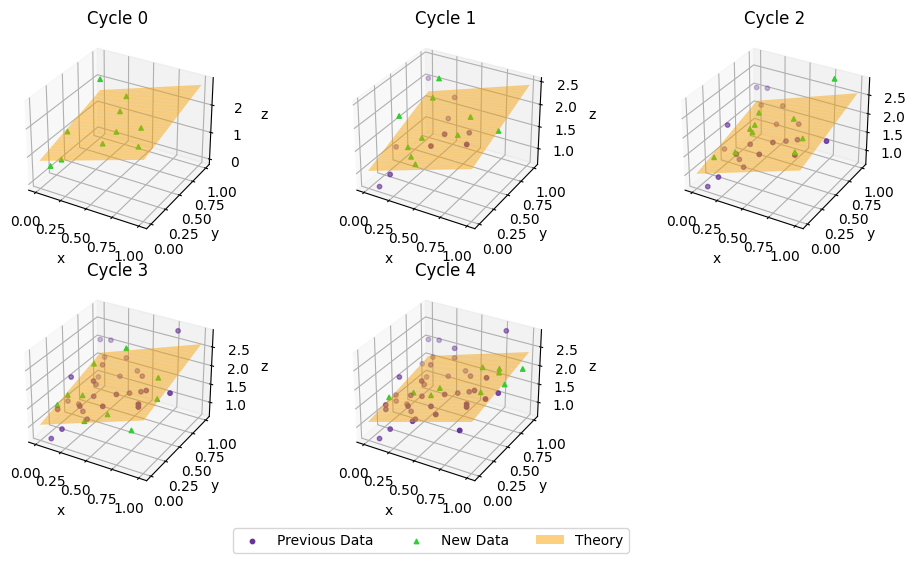

In [13]:
# Change wrap to 3, Adjust dimensions, adjust scatter plot and line colors, shapes, and sizes
fig = plot_results_panel_3d(cycle_mlr,
                            wrap=3,
                            subplot_kw=dict(figsize=(12,6)),  # Panel configurations
                            scatter_previous_kw=dict(color='rebeccapurple', marker='o', s=10),  # Previous data point
                            scatter_current_kw=dict(color='limegreen', marker='^', s=10, alpha=1),  # Current cycle data
                            surface_kw=dict(color='orange'),  # Theory surface
                            );


### Change the Viewing Angle
* You can change the viewing angle by supplying the `view` keyword with a tuple of elevation and azimuth degrees.
* Azimuth is in reference to the XY plane.
* Note that the default viewing angle is not a (0,0) elevation, azimuth. In the case above it is (30,-60).
<div>
<img src="https://matplotlib.org/stable/_images/mplot3d_view_angles.png" width="500"/>
</div>


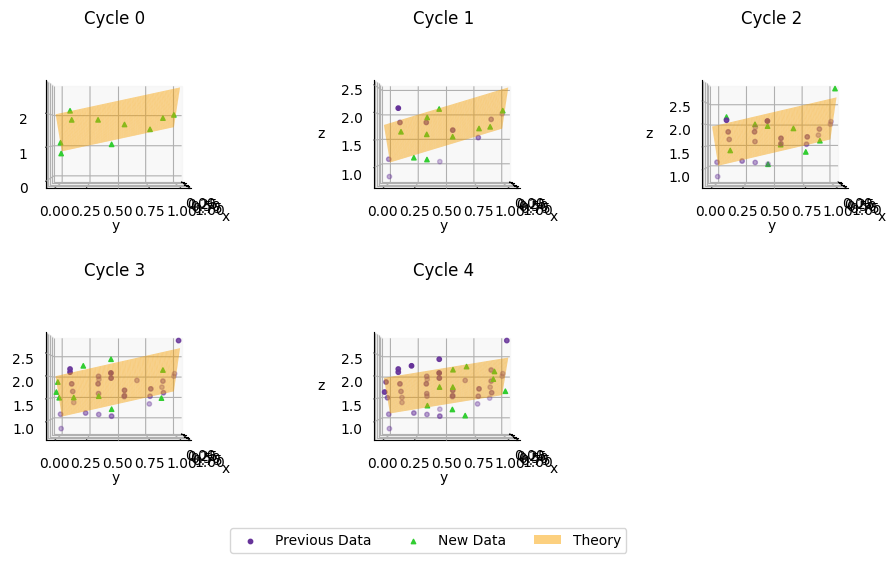

In [14]:
# Change the viewing angle to 0 elevation, 0 azimuth.
fig = plot_results_panel_3d(cycle_mlr,
                            wrap=3,
                            subplot_kw=dict(figsize=(12,6)),  # Panel configurations
                            scatter_previous_kw=dict(color='rebeccapurple', marker='o', s=10),  # Previous data point
                            scatter_current_kw=dict(color='limegreen', marker='^', s=10, alpha=1),  # Current cycle data
                            surface_kw=dict(color='orange'),  # Theory surface
                            view=(0, 0),  # Degrees (elevation, azimuth)
                            );

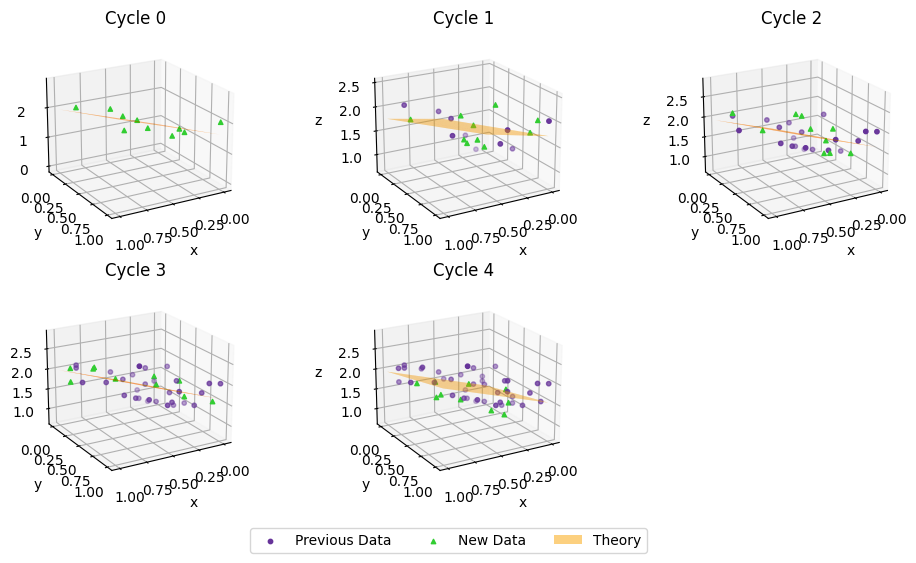

In [15]:
# Change the viewing angle to +20 elevation, +60 azimuth
fig = plot_results_panel_3d(cycle_mlr,
                            wrap=3,
                            subplot_kw=dict(figsize=(12,6)),  # Panel configurations
                            scatter_previous_kw=dict(color='rebeccapurple', marker='o', s=10),  # Previous data point
                            scatter_current_kw=dict(color='limegreen', marker='^', s=10, alpha=1),  # Current cycle data
                            surface_kw=dict(color='orange'),  # Theory surface
                            view=(20, 60),  # Degrees (elevation, azimuth)
                            );
